In [5]:
# =============================================================================
# Import OHLCV data and calculate MACD technical indicator
# Please report bug/issues in the Q&A section
# =============================================================================

# Import necesary libraries
import yfinance as yf

# Download historical data for required stocks
tickers = ["MSFT","AAPL","GOOG","AMZN"]
ohlcv_data = {}


# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='6mo',interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp

def MACD(DF, a=12 ,b=26, c=9):
    """function to calculate MACD
       typical values a(fast moving average) = 12; 
                      b(slow moving average) =26; 
                      c(signal line ma window) =9"""
    df = DF.copy()
    df["ma_fast"] = df["Adj Close"].ewm(span=a, min_periods=a).mean()
    df["ma_slow"] = df["Adj Close"].ewm(span=b, min_periods=b).mean()
    df["macd"] = df["ma_fast"] - df["ma_slow"]
    df["signal"] = df["macd"].ewm(span=c, min_periods=c).mean()
    return df.loc[:,["macd","signal"]]

for ticker in ohlcv_data:
    ohlcv_data[ticker][["MACD","SIGNAL"]] = MACD(ohlcv_data[ticker], a=12 ,b=26, c=9)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

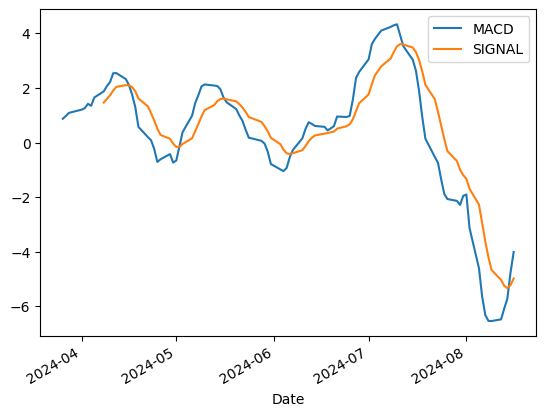

In [30]:
# tmp = ohlcv_data['AMZN'].iloc[550:]
tmp = ohlcv_data['AMZN']
tmp[["MACD","SIGNAL"]].plot()

In [69]:
# =============================================================================
# Import OHLCV data and calculate Bollinger Band technical indicator
# Author : Mayank Rasu (http://rasuquant.com/wp/)
# Please report bug/issues in the Q&A section
# =============================================================================

# Import necesary libraries
import yfinance as yf

# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT","AMZN"]
ohlcv_data = {}

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='6mo',interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp

def Boll_Band(DF, n=14):
    "function to calculate Bollinger Band"
    df = DF.copy()
    df["MB"] = df["Adj Close"].rolling(n).mean()
    df["UB"] = df["MB"] + 2*df["Adj Close"].rolling(n).std(ddof=0)
    df["LB"] = df["MB"] - 2*df["Adj Close"].rolling(n).std(ddof=0)
    df["BB_Width"] = df["UB"] - df["LB"]
    return df[["MB","UB","LB","BB_Width"]]

for ticker in ohlcv_data:
    ohlcv_data[ticker][["MB","UB","LB","BB_Width"]] = Boll_Band(ohlcv_data[ticker])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

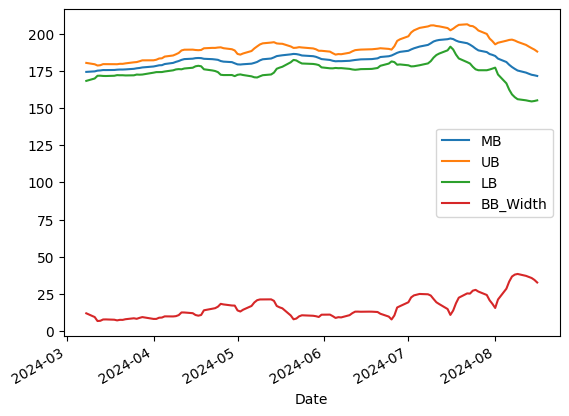

In [70]:
# tmp = ohlcv_data['AMZN'].iloc[550:]
tmp = ohlcv_data['AMZN']
tmp[["MB","UB","LB","BB_Width"]].plot()

In [67]:
# =============================================================================
# Import OHLCV data and calculate ATR (Average True Range) technical indicator
# Author : Mayank Rasu (http://rasuquant.com/wp/)

# Please report bug/issues in the Q&A section
# =============================================================================

# Import necesary libraries
import yfinance as yf

# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT","AMZN"]
ohlcv_data = {}

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='6mo',interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp

def ATR(DF, n=14):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df["H-L"] = df["High"] - df["Low"]
    df["H-PC"] = abs(df["High"] - df["Adj Close"].shift(1))
    df["L-PC"] = abs(df["Low"] - df["Adj Close"].shift(1))
    df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
    df["ATR"] = df["TR"].ewm(com=n, min_periods=n).mean()
    return df["ATR"]

for ticker in ohlcv_data:
    ohlcv_data[ticker]["ATR"] = ATR(ohlcv_data[ticker])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

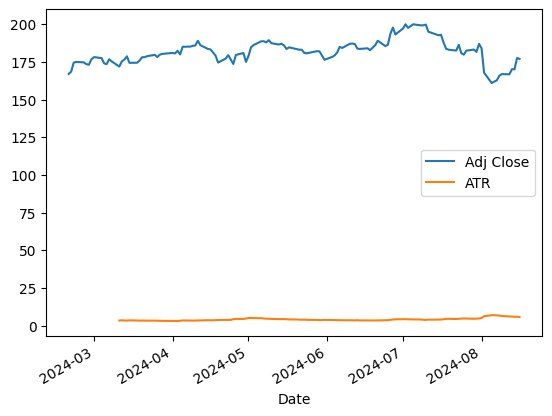

In [68]:
# tmp = ohlcv_data['AMZN'].iloc[550:]
tmp = ohlcv_data['AMZN']
tmp[["Adj Close","ATR"]].plot()

In [64]:
# =============================================================================
# Import OHLCV data and calculate RSI (Relative Strength Index) technical indicators
# Author : Mayank Rasu (http://rasuquant.com/wp/)
 
# Please report bug/issues in the Q&A section
# =============================================================================

# Import necesary libraries
import yfinance as yf
import numpy as np

# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT","AMZN"]
ohlcv_data = {}

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='6mo',interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp
    
def RSI(DF, n=14):
    "function to calculate RSI"
    df = DF.copy()
    df["change"] = df["Adj Close"] - df["Adj Close"].shift(1)
    df["gain"] = np.where(df["change"]>=0, df["change"], 0)
    df["loss"] = np.where(df["change"]<0, -1*df["change"], 0)
    df["avgGain"] = df["gain"].ewm(alpha=1/n, min_periods=n).mean()
    df["avgLoss"] = df["loss"].ewm(alpha=1/n, min_periods=n).mean()
    df["rs"] = df["avgGain"]/df["avgLoss"]
    df["rsi"] = 100 - (100/ (1 + df["rs"]))
    df["signal"] = df["rsi"].ewm(span=9, min_periods=9).mean()
    return df["rsi"], df["signal"]


for ticker in ohlcv_data:
    ohlcv_data[ticker]["RSI"] = RSI(ohlcv_data[ticker])[0]
    ohlcv_data[ticker]["signal"] = RSI(ohlcv_data[ticker])[1]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

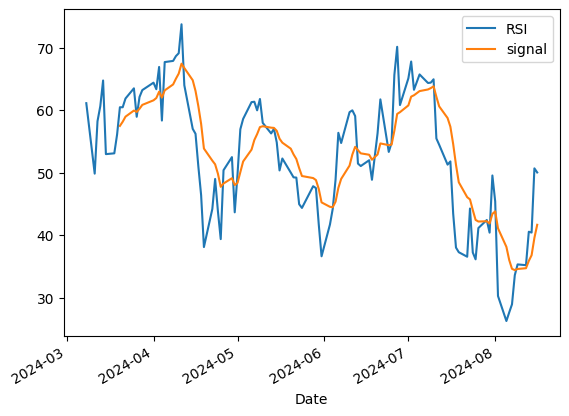

In [65]:
tmp = ohlcv_data['AMZN']
# tmp[["Adj Close","RSI", "signal"]].plot()
tmp[["RSI", "signal"]].plot()

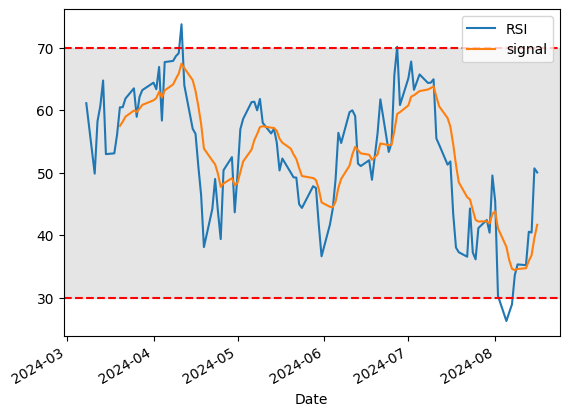

In [66]:
import matplotlib.pyplot as plt

# Plotting the RSI and signal
ax = tmp[["RSI", "signal"]].plot()

# Adding horizontal lines at y=80 and y=20
ax.axhline(y=70, color='r', linestyle='--')
ax.axhline(y=30, color='r', linestyle='--')

# Shading the area between y=20 and y=80
ax.axhspan(30, 70, color='gray', alpha=0.2)

# Display the plot
plt.show()


In [6]:
# =============================================================================
# Import OHLCV data and calculate ATR and ADX technical indicators
# Author : Mayank Rasu (http://rasuquant.com/wp/)

# Please report bug/issues in the Q&A section
# =============================================================================

# Import necesary libraries
import yfinance as yf
import numpy as np

# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT","AMZN"]
ohlcv_data = {}

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='6mo',interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp
    
def ATR(DF, n=14):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df["H-L"] = df["High"] - df["Low"]
    df["H-PC"] = abs(df["High"] - df["Adj Close"].shift(1))
    df["L-PC"] = abs(df["Low"] - df["Adj Close"].shift(1))
    df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
    df["ATR"] = df["TR"].ewm(com=n, min_periods=n).mean()
    return df["ATR"]

def ADX(DF, n=20):
    "function to calculate ADX"
    df = DF.copy()
    df["ATR"] = ATR(DF, n)
    df["upmove"] = df["High"] - df["High"].shift(1)
    df["downmove"] = df["Low"].shift(1) - df["Low"]
    df["+dm"] = np.where((df["upmove"]>df["downmove"]) & (df["upmove"] >0), df["upmove"], 0)
    df["-dm"] = np.where((df["downmove"]>df["upmove"]) & (df["downmove"] >0), df["downmove"], 0)
    df["+di"] = 100 * (df["+dm"]/df["ATR"]).ewm(alpha=1/n, min_periods=n).mean()
    df["-di"] = 100 * (df["-dm"]/df["ATR"]).ewm(alpha=1/n, min_periods=n).mean()
    df["ADX"] = 100 * abs((df["+di"] - df["-di"])/(df["+di"] + df["-di"])).ewm(alpha=1/n, min_periods=n).mean()
    return df["ADX"]

for ticker in ohlcv_data:
    ohlcv_data[ticker]["ADX"] = ADX(ohlcv_data[ticker],20)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

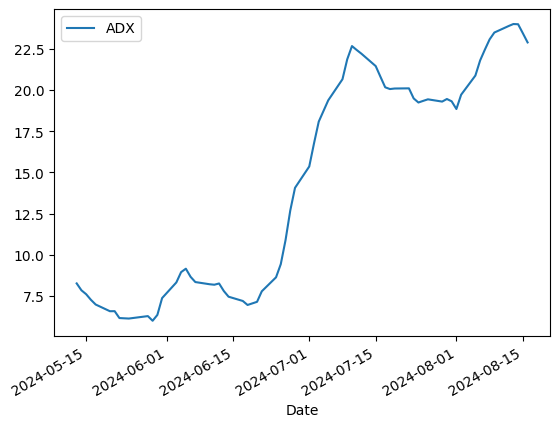

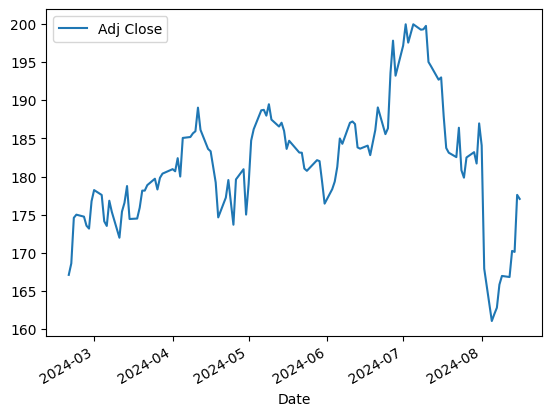

In [75]:
tmp = ohlcv_data['AMZN']
# tmp[["Adj Close","RSI", "signal"]].plot()
tmp[["ADX"]].plot()
tmp[["Adj Close"]].plot()

In [4]:
# =============================================================================
# Import OHLCV data and transform it to Renko
# Author : Mayank Rasu (http://rasuquant.com/wp/)

# Please report bug/issues in the Q&A section
# It helps to find true trends
# =============================================================================

# Import necesary libraries
import yfinance as yf
from stocktrends import Renko

# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT","AMZN"]
ohlcv_data = {}
hour_data = {}
renko_data = {}

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='1mo',interval='5m')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp
    temp = yf.download(ticker,period='1y',interval='1h')
    temp.dropna(how="any",inplace=True)
    hour_data[ticker] = temp
    
def ATR(DF, n=14):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df["H-L"] = df["High"] - df["Low"]
    df["H-PC"] = abs(df["High"] - df["Adj Close"].shift(1))
    df["L-PC"] = abs(df["Low"] - df["Adj Close"].shift(1))
    df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
    df["ATR"] = df["TR"].ewm(com=n, min_periods=n).mean()
    return df["ATR"]

def renko_DF(DF, hourly_df):
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df.drop("Close",axis=1,inplace=True)
    df.columns = ["date","open","high","low","close","volume"]
    df2 = Renko(df)
    df2.brick_size = 3*round(ATR(hourly_df,120).iloc[-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df

for ticker in ohlcv_data:
    renko_data[ticker] = renko_DF(ohlcv_data[ticker],hour_data[ticker])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: >

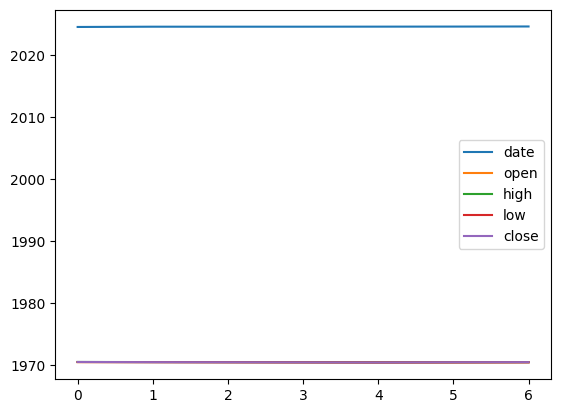

In [13]:
tmp = renko_data['AMZN']
tmp.plot()


In [7]:
# !pip install TA-Lib
# !pip install steem

In [22]:
tmp

,date,open,high,low,close,uptrend
0,2024-07-17 09:30:00-04:00,180.0,186.0,180.0,186.0,True
1,2024-08-02 09:30:00-04:00,180.0,180.0,174.0,174.0,False
2,2024-08-02 09:30:00-04:00,174.0,174.0,168.0,168.0,False
3,2024-08-02 09:55:00-04:00,168.0,168.0,162.0,162.0,False
4,2024-08-05 09:30:00-04:00,162.0,162.0,156.0,156.0,False
5,2024-08-09 10:10:00-04:00,162.0,168.0,162.0,168.0,True
6,2024-08-15 09:30:00-04:00,168.0,174.0,168.0,174.0,True
